# Customer Churn Prediction - EDA
Status: In Progress


In [37]:
import pandas as pd

df = pd.read_csv(r'C:\Users\eenaa\Downloads\DS PROJECTS\customer-churn-statistical-learning\data\churn.csv')
df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
df.columns = df.columns.str.strip()
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [39]:
df.info()          # Data types, non-null counts
df.describe()      # Summary statistics for numerical columns
df.isnull().sum()  # Check missing values
df['Churn'].value_counts()  # Distribution of target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Churn
No     5174
Yes    1869
Name: count, dtype: int64

Target variable is `Churn`, representing whether a customer left the service.

In [40]:
df['Churn'].value_counts(normalize=True) * 100


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

Around 26.5% of customers churned, indicating a class imbalance that must be handled during modeling.


I am focusing my analysis on features that are actionable and have business relevance for churn reduction strategies.


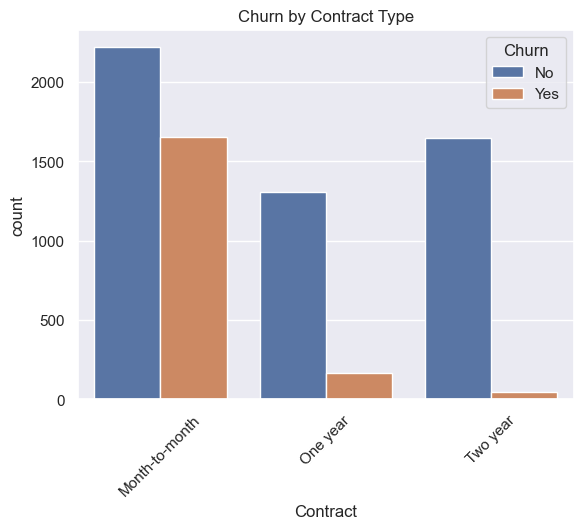

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.xticks(rotation=45)
plt.show()


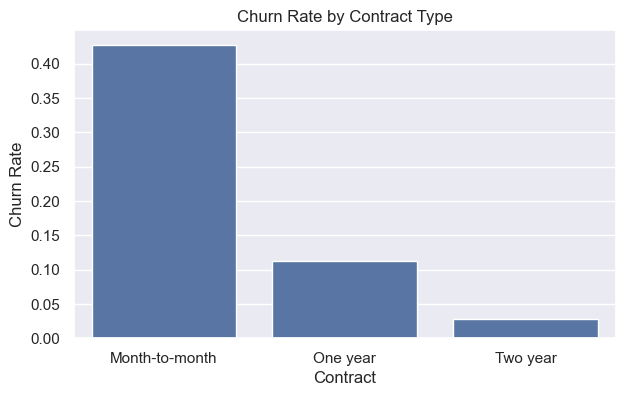

In [66]:
contract_churn = (
    df.groupby('Contract')['Churn']
    .value_counts(normalize=True)
    .rename('rate')
    .reset_index()
)

contract_churn = contract_churn[contract_churn['Churn'] == 'Yes']

plt.figure(figsize=(7,4))
sns.barplot(x='Contract', y='rate', data=contract_churn)
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.show()


Month-to-month customers show significantly higher churn, indicating the importance of long-term contracts in retention.

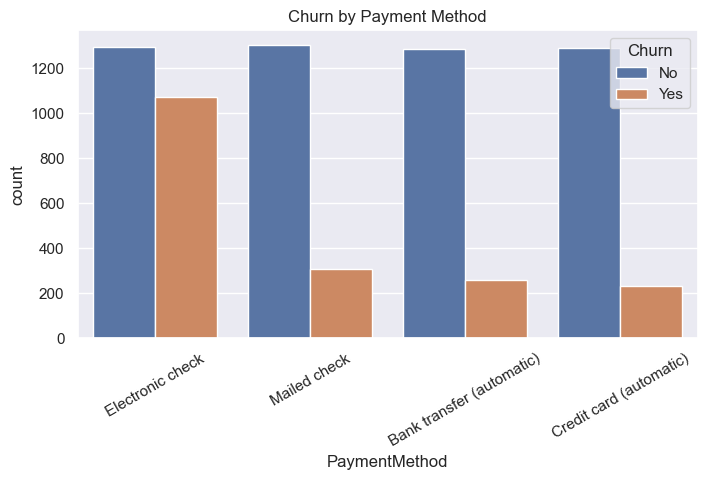

In [72]:
plt.figure(figsize=(8,4))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.xticks(rotation=30)
plt.title('Churn by Payment Method')
plt.show()


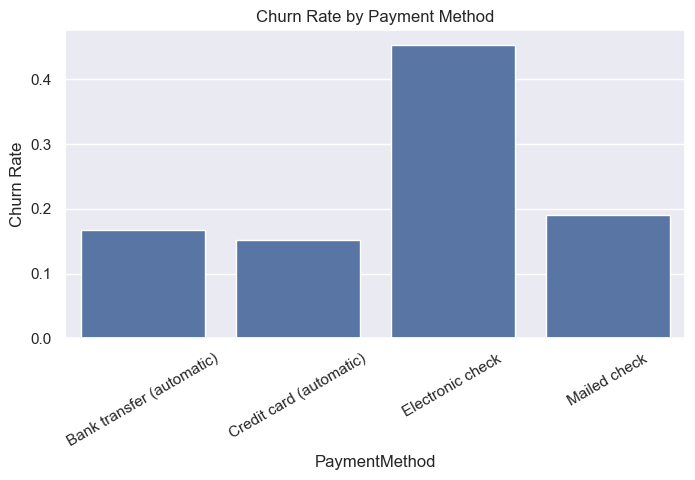

In [73]:
payment_churn = (
    df.groupby('PaymentMethod')['Churn']
    .value_counts(normalize=True)
    .rename('rate')
    .reset_index()
)

payment_churn = payment_churn[payment_churn['Churn'] == 'Yes']

plt.figure(figsize=(8,4))
sns.barplot(x='PaymentMethod', y='rate', data=payment_churn)
plt.xticks(rotation=30)
plt.title('Churn Rate by Payment Method')
plt.ylabel('Churn Rate')
plt.show()


Electronic check users exhibit higher churn, suggesting potential friction in payment experience.

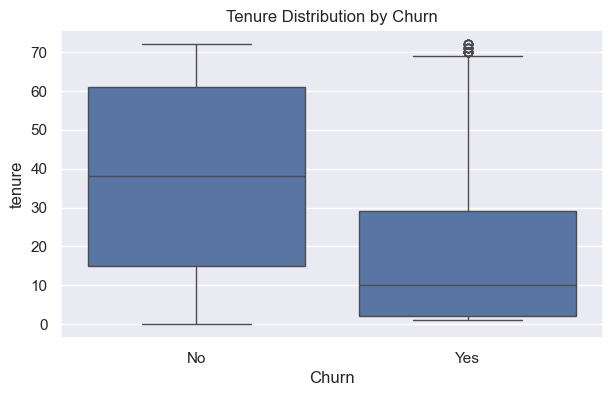

In [67]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure Distribution by Churn')
plt.show()



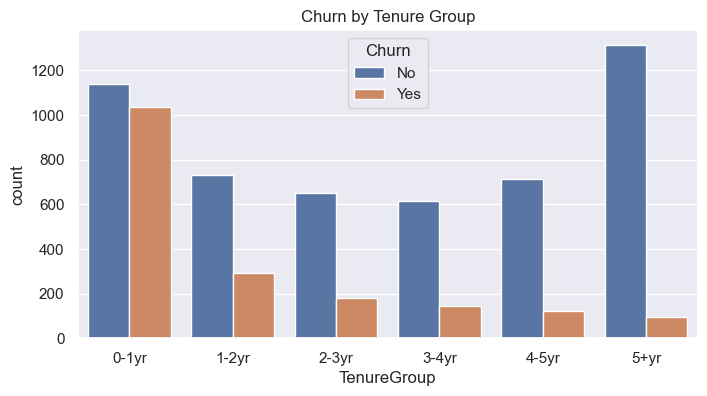

In [68]:
df['TenureGroup'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 36, 48, 60, 72],
    labels=['0-1yr','1-2yr','2-3yr','3-4yr','4-5yr','5+yr']
)

plt.figure(figsize=(8,4))
sns.countplot(x='TenureGroup', hue='Churn', data=df)
plt.title('Churn by Tenure Group')
plt.show()


Customers with lower tenure are more likely to churn, highlighting early-stage retention as critical.

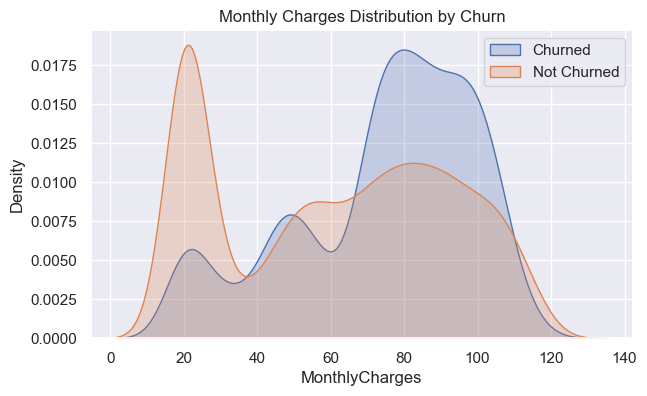

In [69]:
plt.figure(figsize=(7,4))
sns.kdeplot(df[df['Churn']=='Yes']['MonthlyCharges'], label='Churned', fill=True)
sns.kdeplot(df[df['Churn']=='No']['MonthlyCharges'], label='Not Churned', fill=True)
plt.title('Monthly Charges Distribution by Churn')
plt.legend()
plt.show()


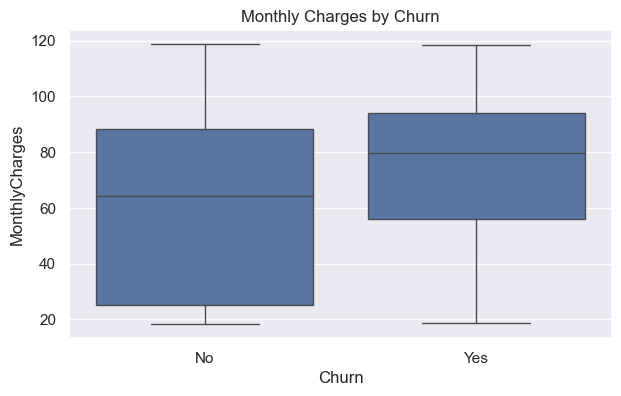

In [70]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()


Churned customers tend to have higher monthly charges, indicating price sensitivity.

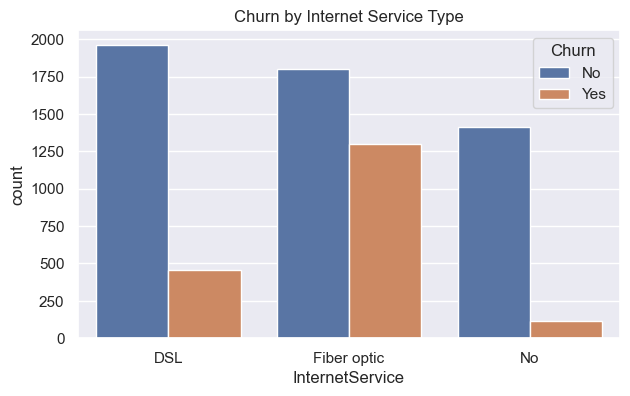

In [74]:
plt.figure(figsize=(7,4))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service Type')
plt.show()


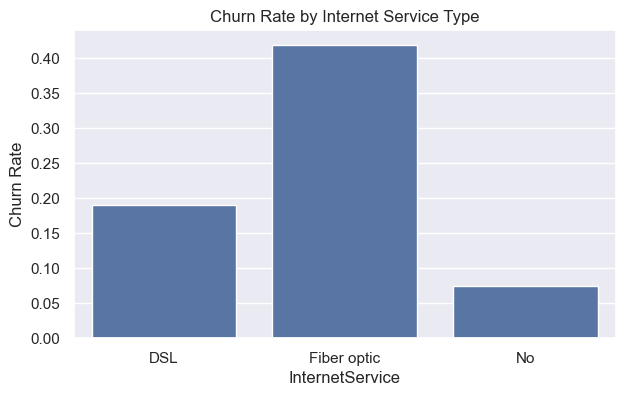

In [75]:
internet_churn = (
    df.groupby('InternetService')['Churn']
    .value_counts(normalize=True)
    .rename('rate')
    .reset_index()
)

internet_churn = internet_churn[internet_churn['Churn'] == 'Yes']

plt.figure(figsize=(7,4))
sns.barplot(x='InternetService', y='rate', data=internet_churn)
plt.title('Churn Rate by Internet Service Type')
plt.ylabel('Churn Rate')
plt.show()


Fiber optic customers show higher churn, possibly due to service quality or pricing concerns.

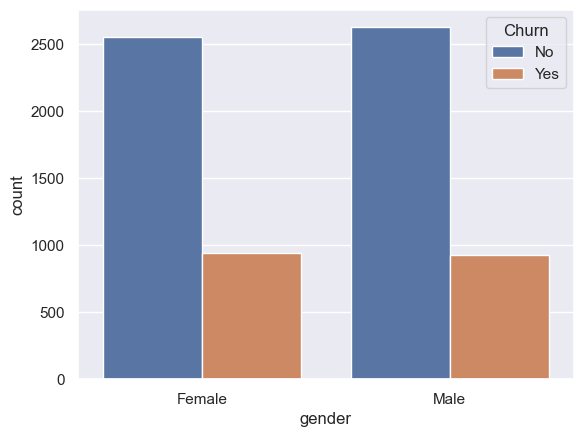

In [71]:
#brief check on gender distribution
sns.countplot(x='gender', hue='Churn', data=df)
plt.show()


Gender shows minimal difference in churn rates and is not a primary churn driver.


- Month-to-month contracts exhibit the highest churn rates.
- Customers with shorter tenure are significantly more likely to churn.
- Higher monthly charges are associated with increased churn.
- Electronic check users show elevated churn, suggesting payment friction.
- Fiber optic internet users churn more than DSL users.
- Gender shows minimal impact on churn.

In [87]:
df.drop(columns=['customerID'], inplace=True)


In [88]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [90]:
df.isnull().sum()
df.dropna(inplace=True)


In [93]:
df_encoded = pd.get_dummies(df, drop_first=True)



In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges']
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])


In [103]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [104]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [105]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.79      0.79      1407

ROC AUC: 0.834779806492693


In [106]:
feature_importance = pd.Series(
    model.coef_[0],
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


TotalCharges_20.5      1.518631
TotalCharges_19.45     1.437850
TenureGroup_5+yr       1.388963
TotalCharges_288.05    1.187897
TotalCharges_259.8     1.155780
TotalCharges_20.1      1.143841
TotalCharges_19.6      1.092680
TenureGroup_4-5yr      1.075207
TotalCharges_740.3     1.043730
TotalCharges_19.9      1.024894
dtype: float64

### Business Recommendations
- Incentivize month-to-month users to shift to long-term contracts.
- Focus retention campaigns on early-tenure customers.
- Review pricing strategy for high monthly charge segments.
- Improve payment experience for electronic check users.
